# Reading and Writing Data in Text Format

pandas features a number of functions for reading tabular data as a DataFrame object

Table 6-1 summarizes some of them, though read_csv and read_table are likely the ones you’ll use the most

Table 6-1. Parsing functions in pandas
<p align='center'>
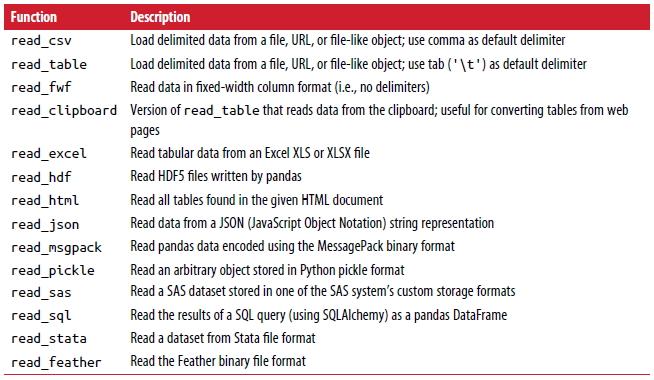
</p>

I’ll give an overview of the mechanics of these functions, which are meant to convert text data into a DataFrame

The optional arguments for these functions may fall into a few categories:

* Indexing

  * Can treat one or more columns as the returned DataFrame, and whether to get column names from the file, the user, or not at all

* Type inference and data conversion

  * This includes the user-defined value conversions and custom list of missing value markers

* Datetime parsing

  * Includes combining capability, including combining date and time information spread over multiple columns into a single column in the result

* Iterating

  * Support for iterating over chunks of very large files

* Unclean data issues

  *  Skipping rows or a footer, comments, or other minor things like numeric data with thousands separated by commas


In [42]:
!mkdir examples

mkdir: cannot create directory ‘examples’: File exists


In [49]:
import pandas as pd
df = pd.DataFrame([[1, 2, 3, 4, 'hello'], 
                   [5, 6, 7, 8, 'world'], 
                   [9, 10, 11, 12, 'foo']],
                   columns=['a', 'b', 'c', 'd', 'message'])
df.to_csv('examples/ex1.csv', index=False)

Handling dates and other custom types can require extra effort. Let’s start with a small comma-separated (CSV) text file:

In [50]:
!cat examples/ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


Since this is comma-delimited, we can use read_csv to read it into a DataFrame:

In [51]:
df = pd.read_csv('examples/ex1.csv')

In [52]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


We could also have used read_table and specified the delimiter:

In [56]:
pd.read_table('examples/ex1.csv', sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


A file will not always have a header row. Consider this file:

In [64]:
df = pd.DataFrame([[1, 2, 3, 4, 'hello'],
                   [5, 6, 7, 8, 'world'],
                   [9, 10, 11, 12, 'foo']])
df.to_csv('examples/ex2.csv', index=False, header=False)

In [66]:
!cat examples/ex2.csv

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


To read this file, you have a couple of options. You can allow pandas to assign default column names, or you can specify names yourself:

In [68]:
pd.read_csv('examples/ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [71]:
pd.read_csv('examples/ex2.csv', names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Suppose you wanted the message column to be the index of the returned DataFrame

You can either indicate you want the column at index 4 or named 'message' using the index_col argument:

In [72]:
names = ['a', 'b', 'c', 'd', 'message']

In [73]:
pd.read_csv('examples/ex2.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In the event that you want to **form a hierarchical index from multiple columns**, pass a list of column numbers or names:

In [150]:
import numpy as np
key1 = sum([['one' for i in range(4)], ['two' for i in range(4)]], [])
key2 = sum([list('abcd') for i in range (2)], [])
value1 = np.linspace(1, 15, 8).astype(np.int)
value2 = np.linspace(2, 16, 8).astype(np.int)
df = pd.DataFrame({'key1': [i for i in key1],
                   'key2': [i for i in key2],
                   'value1': [i for i in value1],
                   'value2': [i for i in value2]})
df.to_csv('examples/csv_mindex.csv', index=False)

In [151]:
!cat examples/csv_mindex.csv

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [152]:
parsed = pd.read_csv('examples/csv_mindex.csv',
                     index_col=['key1', 'key2'])

In [153]:
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16